In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import collections
import operator
%matplotlib  

Using matplotlib backend: Qt5Agg


In [63]:
G2= nx.read_gml('data.gml') 
#with open('EN.edges', 'rb') as inf:
    #next(inf, '')   # skip a line
    #G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")

In [7]:
def calculate_measure(G2):
    print(nx.info(G2))

    betweenness = nx.betweenness_centrality(G2, normalized=True).values() 
    closeness = nx.closeness_centrality(G2).values()
    
    print("Number of isolated nodes: ", nx.number_of_isolates(G2))

    if G2.is_directed():
        calc_measure_dir(G2)
    else:
        giant_component= sorted(nx.connected_component_subgraphs(G2), key = len, reverse=True)
        print("Size of biggest GCC (nodes, edges):", giant_component[0].order(), giant_component[0].size())
        
    print("Max betweeness centrality: ", np.max(np.array(list(betweenness))))
    print("Average betweenness centrality", np.mean(np.array(list(betweenness))))
    print("Average closeness centrality", np.mean(np.array(list(closeness))))
    print("Max closeness centrality: ", np.max(np.array(list(closeness))))
    print("Average clustering", nx.average_clustering(G2.to_undirected()))
    print("Assortativity measures: \n Coeff: ", nx.degree_assortativity_coefficient(G2))  
    
  

In [8]:
calculate_measure(G2)
print(nx.diameter(G2) ) 

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 254
Max betweeness centrality:  0.5699890527836184
Average betweenness centrality 0.021881977671451357
Average closeness centrality 0.3893412505666164
Max closeness centrality:  0.6440677966101694
Average clustering 0.5731367499320134
Assortativity measures: 
 Coeff:  -0.16522513442236916
5


In [10]:
copy = G.copy()

G2=nx.convert_node_labels_to_integers(copy, first_label=1, ordering='default') #navie anonymization



#plt.figure(figsize=(15,15))

#nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True,discard_old_labels=True)
#plt.show()

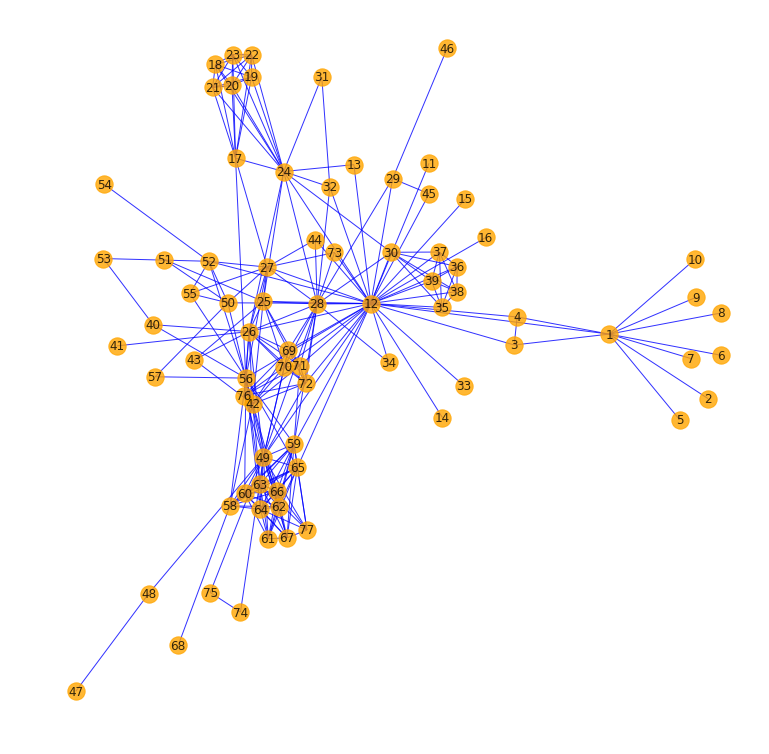

In [11]:


plt.figure(figsize=(10,10))
#plt.show()

nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True)


In [53]:
p_new_connection = 0.10
p_remove_connection = 1

In [54]:


def add_and_remove_edges(G2, p_new_connection, p_remove_connection):    
    '''    
    for each node,    
      add a new connection to random other node, with prob p_new_connection,    
      remove a connection, with prob p_remove_connection    

    operates on G in-place    
    '''                
    new_edges = []    
    rem_edges = []    

    for node in G2.nodes():    
        # find the other nodes this one is connected to    
        connected = [to for (fr, to) in G2.edges(node)]    
        # and find the remainder of nodes, which are candidates for new edges   
        unconnected = [n for n in G2.nodes() if not n in connected]    

        # probabilistically add a random edge    
        if len(unconnected): # only try if new edge is possible    
            if random.random() < p_new_connection:    
                new = random.choice(unconnected)    
                G2.add_edge(node, new)    
                print ("\tnew edge:\t {} -- {}".format(node, new))    
                new_edges.append( (node, new) )    
                # book-keeping, in case both add and remove done in same cycle  
                unconnected.remove(new)    
                connected.append(new)    

        # probabilistically remove a random edge    
        if len(connected): # only try if an edge exists to remove    
            if random.random() < p_remove_connection:    
                remove = random.choice(connected)    
                G2.remove_edge(node, remove)    
                print ("\tedge removed:\t {} -- {}".format(node, remove))    
                rem_edges.append( (node, remove) )    
                # book-keeping, in case lists are important later?    
                connected.remove(remove)    
                unconnected.append(remove)    
    return rem_edges, new_edges 

rem_edges, new_edges = add_and_remove_edges(G2, p_new_connection, p_remove_connection)

	new edge:	 1 -- 47
	edge removed:	 1 -- 77
	new edge:	 2 -- 13
	edge removed:	 2 -- 68
	new edge:	 3 -- 49
	edge removed:	 3 -- 20
	new edge:	 4 -- 29
	edge removed:	 4 -- 12
	new edge:	 5 -- 23
	edge removed:	 5 -- 23
	new edge:	 6 -- 68
	edge removed:	 6 -- 20
	new edge:	 7 -- 37
	edge removed:	 7 -- 37
	new edge:	 8 -- 36
	edge removed:	 8 -- 1
	new edge:	 9 -- 52
	edge removed:	 9 -- 1
	new edge:	 10 -- 53
	edge removed:	 10 -- 53
	new edge:	 11 -- 52
	edge removed:	 11 -- 63
	new edge:	 12 -- 11
	edge removed:	 12 -- 34
	new edge:	 13 -- 72
	edge removed:	 13 -- 72
	new edge:	 14 -- 44
	edge removed:	 14 -- 12
	new edge:	 15 -- 45
	edge removed:	 15 -- 45
	new edge:	 16 -- 28
	edge removed:	 16 -- 12
	new edge:	 17 -- 13
	edge removed:	 17 -- 19
	new edge:	 18 -- 27
	edge removed:	 18 -- 71
	new edge:	 19 -- 41
	edge removed:	 19 -- 20
	new edge:	 20 -- 74
	edge removed:	 20 -- 17
	new edge:	 21 -- 6
	edge removed:	 21 -- 17
	new edge:	 22 -- 9
	edge removed:	 22 -- 19
	new edge:

In [24]:

ebunch= [(5,8),(6,10),(46,5),(46,6),(46,1)]
G2.add_edges_from(ebunch)
calculate_measure(G2)            #5 %
print(nx.diameter(G2) ) 

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 252
Average degree:   6.5455
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 252
Max betweeness centrality:  0.5559835767584167
Average betweenness centrality 0.024306220095693772
Average closeness centrality 0.36838192049996477
Max closeness centrality:  0.5984251968503937
Average clustering 0.5697796335607439
Assortativity measures: 
 Coeff:  -0.11230249216775473
7


In [46]:
#sorted(G2.degree, key=lambda x: x[1], reverse=True) 

ebunch1= [(8,1)]
G2.add_edges_from(ebunch1)
calculate_measure(G2)            #10 %
print(nx.diameter(G2) ) 


Name: 
Type: Graph
Number of nodes: 77
Number of edges: 255
Average degree:   6.6234
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 255
Max betweeness centrality:  0.45019215568286797
Average betweenness centrality 0.024479380268853955
Average closeness centrality 0.3665797226106486
Max closeness centrality:  0.5801526717557252
Average clustering 0.5577176249397956
Assortativity measures: 
 Coeff:  -0.07165433050744861
7


In [50]:
#sorted(G2.degree, key=lambda x: x[1], reverse=True) 
ebunch3= [(2,8)]
G2.add_edges_from(ebunch3)
calculate_measure(G2)            #10 %
print(nx.diameter(G2) ) 


Name: 
Type: Graph
Number of nodes: 77
Number of edges: 263
Average degree:   6.8312
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 263
Max betweeness centrality:  0.34237622285311353
Average betweenness centrality 0.023590795169742534
Average closeness centrality 0.37430134398172804
Max closeness centrality:  0.5671641791044776
Average clustering 0.4328639051364839
Assortativity measures: 
 Coeff:  0.017362369725175644
7


In [56]:
ebunch4= [(54,10)]
G2.add_edges_from(ebunch4)
calculate_measure(G2)            #100 %
print(nx.diameter(G2) ) 


Name: 
Type: Graph
Number of nodes: 77
Number of edges: 264
Average degree:   6.8571
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 264
Max betweeness centrality:  0.13640831451121485
Average betweenness centrality 0.021225791752107537
Average closeness centrality 0.3953540076693061
Max closeness centrality:  0.5277777777777778
Average clustering 0.1675984081858393
Assortativity measures: 
 Coeff:  0.12218508991839926
5


In [ ]:
sorted(G2.degree, key=lambda x: x[1], reverse=True) # highest connected nodes

In [ ]:
#[n for n in G2.neighbors(24)]
def neighbors(G2, n):
 
 return list(G2.neighbors(24))
print(" neighbours = ", neighbors(G2,'24'))  

In [ ]:
res = [1, 2, 3, 4, 5, 12, 16, 20, 23, 87, 98, 25, 33, 34, 37, 38, 39, 41, 42, 43, 45, 47, 49, 50, 52, 64, 54, 60, 62, 63, 65, 67, 70, 75, 76, 79, 81, 153, 95, 96, 97, 170, 100, 102, 103, 106, 108, 113, 114, 115, 86, 120, 169, 124, 125, 126, 130, 131, 132, 133, 134, 210, 216, 211, 154, 157, 158, 85, 161, 164, 168, 212, 176, 179, 187, 188, 26, 191, 192, 229, 196, 197, 203, 230, 206, 209, 232, 214, 215, 220, 51, 225, 226, 227, 138, 110, 233, 162]
k = G2.subgraph(res) 
plt.figure(figsize=(15,15))
nx.draw(k, alpha=0.5, edge_color='blue', node_color='orange',with_labels=True,discard_old_labels=True,node_size=[v * 100 for v in dict(k.degree()).values()])

In [ ]:

#calculate_measure(G2) #10 %
#print(nx.diameter(G2) )


In [ ]:

#G2.add_edges_from(rem_edges)

plt.figure(figsize=(15,15))


nx.draw(G2, alpha=0.4, edge_color='b', node_color='orange',with_labels=True, edgelist=rem_edges)



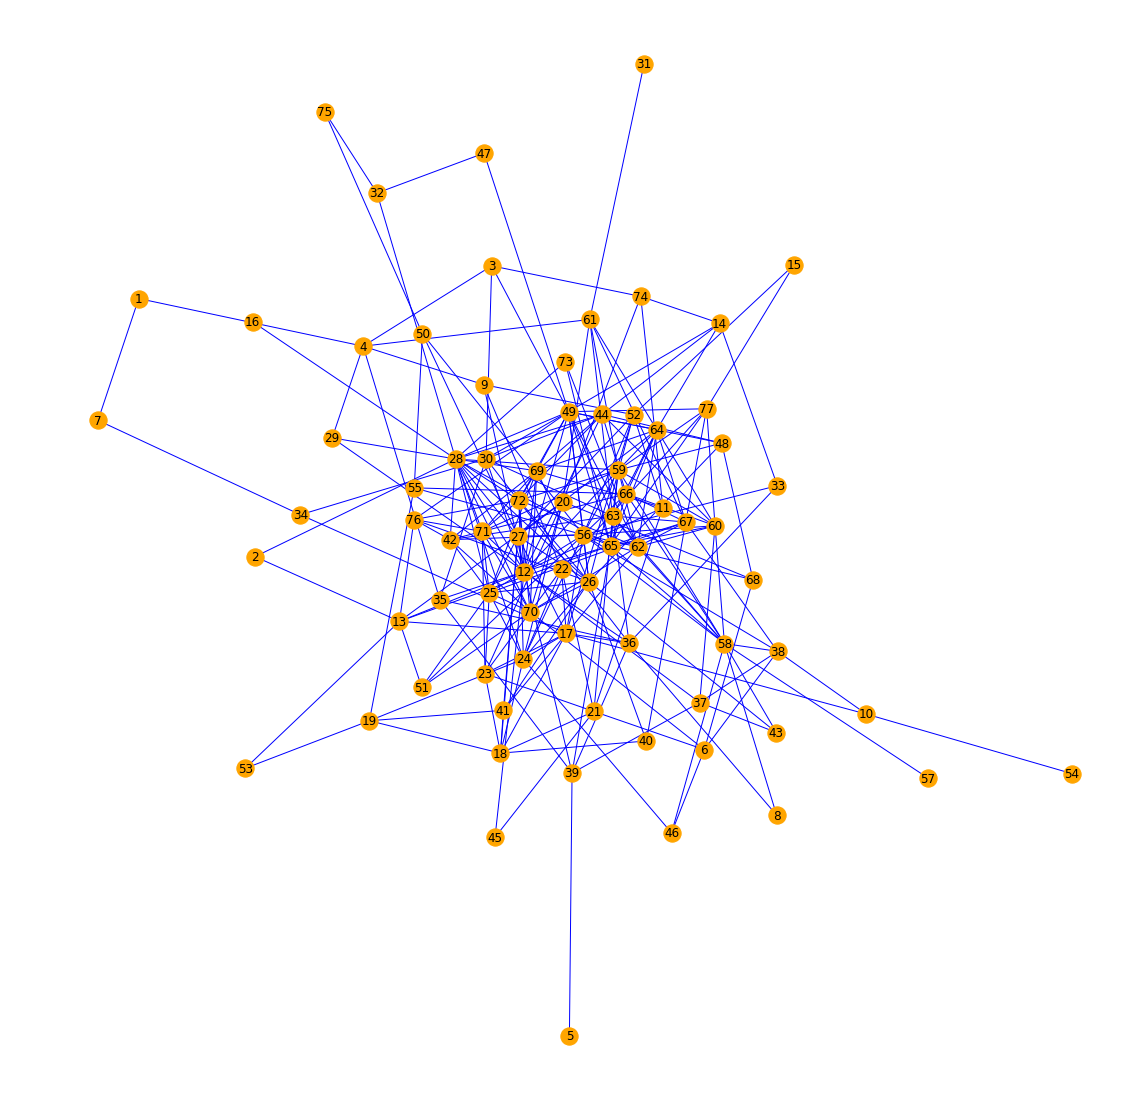

In [57]:

plt.figure(figsize=(15,15))
nx.draw(G2, with_labels=True, edge_color='b', node_color='orange')


In [58]:
G2.node[10] # H0 queary returns labels of  node


{}

In [59]:
G2.degree(10) # H1 queary returns degree of specified node 


3

In [60]:
list(G2.degree((G2.neighbors(10)) )  ) # H2 returns the degrees of node neighbors
    

[(17, 11), (38, 6), (54, 1)]

def neighbors(G2, n):
 
 return list(G2.neighbors(24))
print(" neighbours = ", neighbors(G2,'24'))  

In [61]:
list(nx.bfs_edges(G2, 10)) 

[(10, 17),
 (10, 38),
 (10, 54),
 (17, 18),
 (17, 22),
 (17, 23),
 (17, 24),
 (17, 27),
 (17, 56),
 (17, 52),
 (17, 34),
 (17, 36),
 (17, 13),
 (38, 37),
 (38, 58),
 (38, 6),
 (38, 67),
 (18, 19),
 (18, 21),
 (18, 40),
 (18, 41),
 (22, 77),
 (22, 9),
 (23, 20),
 (23, 71),
 (23, 25),
 (24, 26),
 (24, 28),
 (24, 46),
 (24, 72),
 (27, 12),
 (27, 50),
 (27, 64),
 (56, 42),
 (56, 49),
 (56, 55),
 (56, 59),
 (56, 60),
 (56, 62),
 (56, 65),
 (56, 66),
 (56, 51),
 (56, 33),
 (52, 15),
 (52, 11),
 (34, 7),
 (34, 30),
 (36, 35),
 (36, 39),
 (36, 63),
 (36, 8),
 (13, 53),
 (13, 2),
 (13, 76),
 (37, 43),
 (58, 57),
 (6, 70),
 (6, 68),
 (67, 61),
 (21, 45),
 (9, 4),
 (20, 74),
 (71, 69),
 (26, 48),
 (28, 29),
 (28, 32),
 (28, 44),
 (28, 73),
 (28, 16),
 (50, 75),
 (64, 14),
 (49, 3),
 (49, 47),
 (7, 1),
 (39, 5),
 (61, 31)]

In [ ]:
#new_graph = random_edge(graph, del_orig=True)

nx.draw(graph, with_labels=True)
#plt.show()

In [ ]:
 #sorted(list(nx.dfs_preorder_nodes(G2, 6) ) )
    
#graphs = list(nx.connected_component_subgraphs(G2)) 

list(nx.connected_components(G2)  )

In [ ]:

def random_edge(graph, del_orig=True):
    '''
    Create a new random edge and delete one of its current edge if del_orig is True.
    :param graph: networkx graph
    :param del_orig: bool
    :return: networkx graph
    '''
    edges = list(graph.edges)
    nonedges = list(nx.non_edges(graph))

    # random edge choice
    chosen_edge = random.choice(edges)
    chosen_nonedge = random.choice([x for x in nonedges if chosen_edge[0] == x[0]])

    if del_orig:
        # delete chosen edge
        graph.remove_edge(chosen_edge[0], chosen_edge[1])
    # add new edge
    graph.add_edge(chosen_nonedge[0], chosen_nonedge[1])

    return graph
    

In [ ]:
new_graph = random_edge(graph, del_orig=True)

nx.draw(new_graph, with_labels=True)
plt.show() 

G2.edges()

In [ ]:
for i in new_graph.degree():
    print(i) 

In [ ]:
for i in G2.degree():
    print(i) 

In [ ]:
calculate_measure(graph)